<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-coloring-book/blob/master/main_coloring_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Interactiv Coloring Book**


![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/coloring_book_picture.png)

**Group Members**
* Johannes Scheibe
* Thilo von Glan 
* Jill Baumann

## **Main goal**
"Create a coloring template out of a photo"

**Subtasks**

Make and/or select images and load these images
* Handle color space (from BGR to RGB or CIELAB)
  
Segmentate the image into sensible parts/regions/segments
* Different methods possible
  * manually choose each region
  * define the number of regions manually
  * recognize regions automatically, based on color differences 
    * opportunity to change parameters
* Algorithms
  * Preprocessing
    * apply different filters to support the edge detection
      * monochrome picture
      * smooth the image (Gaussian filter)
      * contrast adjustment 
  * Edge detection
    * brightness variation between bordering pixels -> Edge
  * Image segmentation
    * region growing
    * based on colors ((SLIC)Superpixels)

Make the boarder of each segment clearly visible (without colours)

Provide these colors
* Color detection
  * define a set of colors
  * assign colors from the predefined set to the regions based on their (average) color
  * replace colors with appropiate, predefined numbers

User interface 
* upload the picture
* download the result
* adjust settings to get different results




**Scenarios**
* blurred images
* high detailled images
* existing images from coloring books
* faces

# Steps

0.   Accusation of Pictures 70%

*   We have collected some selfmade which are however quite complex and difficult in a coloring book and took some from the internet which are easier. We should also make some "easy to colorbook" pictures ourselves.

1.   Proprocessing of picture 60%

*   We have already tried out differnt methods:
  * Monochrome Filter
  * Gaussian Blur
  * Contrast
  * Edge Detection
  * Color Quantization
  * Color Detection with HSV
*   Now we have to see which are useful for us and are helping our later steps (SLIC)


2.   Image Segmantation 20%

*   We have succesfully implemented a form of the SLIC algorithim and now need to opimize the result either inside SLIC itself or by preprocessing

3.   Drawing Edges 10%

*   We have made fist experemints with Edge Detection and research on edge detection with SLIC, but still need to decide on when to use what method and how to implement it correctly

4.   Extracting Colors and assigning correct numbers to fields 0%

*   Extracting all color except for the color the boarders have should probably not ne too hard and at that point we would already have a coloring book which says "go ahead I don't care in what colours you paint. More interesting would be a "Paint according to numbers" though, but that is of course a bit more complex. So the numbers are probably our last step because we haven't tried anything in the direction of
  * Color standartization
  * Color detection, for each segment
  * Drawing numbers fittingly



# **Project Planing**

![alt text](https://github.com/uol-mediaprocessing/group-projects-coloring-book/blob/master/Planung.PNG?raw=1)

# **Pictures**

In [117]:
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-FC_Valencia.png
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/car.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/clock.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/cup.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/doctor.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/bus.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/lego.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/penguin.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/soccer.jpg
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face1.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face2.JPG

--2019-11-19 19:10:55--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78308 (76K) [image/png]
Saving to: ‘Badge-Liverpool.png.8’

Badge-Liverpool.png 100%[===================>]  76.47K  --.-KB/s    in 0.007s  

2019-11-19 19:10:55 (10.1 MB/s) - ‘Badge-Liverpool.png.8’ saved [78308/78308]

--2019-11-19 19:10:57--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-FC_Valencia.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.

In [0]:
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread("Badge-Liverpool.png")
img2 = cv2.imread("Badge-FC_Valencia.png")
img3 = cv2.imread("car.JPG")
img4 = cv2.imread("cup.JPG")
img5 = cv2.imread("doctor.jpg")
img6 = cv2.imread("lego.jpg")
img7 = cv2.imread("Board-Game.jpeg")
img8 = cv2.imread("penguin.JPG")
img9 = cv2.imread("soccer.jpg")
img10 = cv2.imread("clock.JPG")
img11 = cv2.imread("bus.JPG")
img12 = cv2.imread("face1.JPG")
img13 = cv2.imread("face2.JPG")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)
img9 = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)
img10 = cv2.cvtColor(img10, cv2.COLOR_BGR2RGB)
img11 = cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)
img12 = cv2.cvtColor(img12, cv2.COLOR_BGR2RGB)
img13 = cv2.cvtColor(img13, cv2.COLOR_BGR2RGB)


<function matplotlib.pyplot.show>

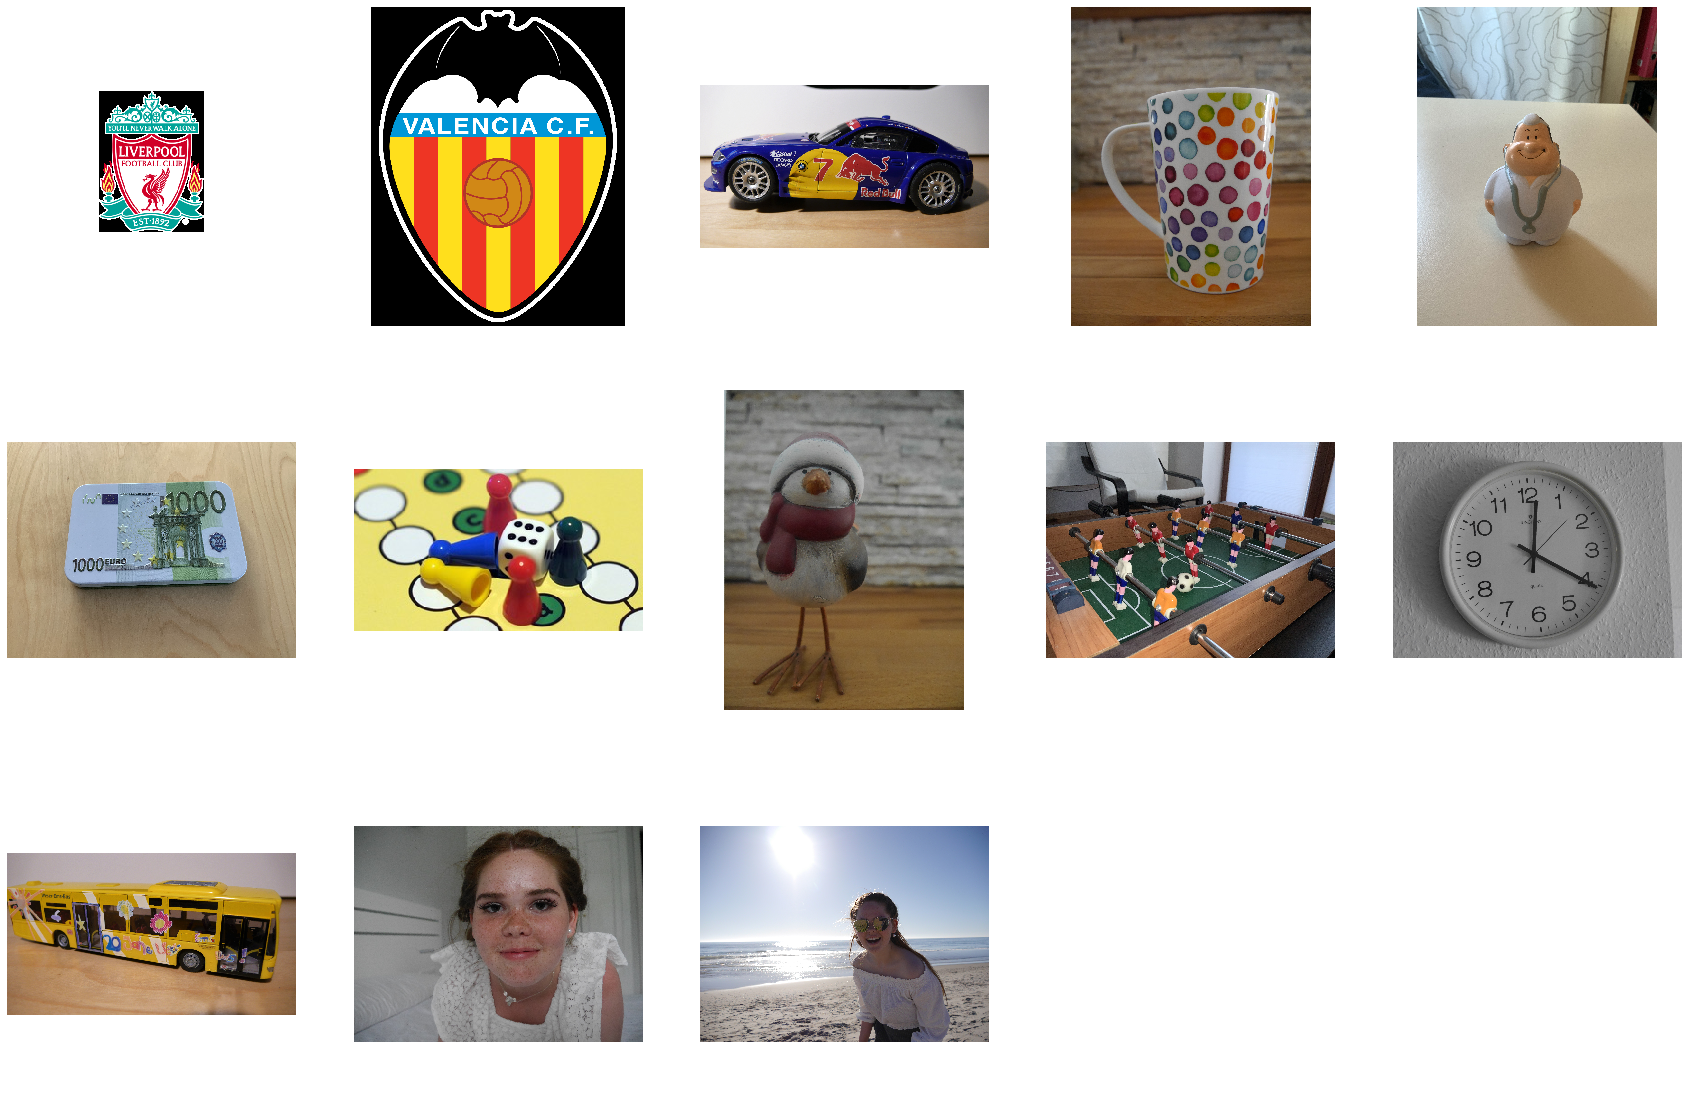

In [119]:
fig, axs = plt.subplots(3,5)
axs[0,0].imshow(img1)
axs[0,1].imshow(img2)
axs[0,2].imshow(img3)
axs[0,3].imshow(img4)
axs[0,4].imshow(img5)
axs[1,0].imshow(img6)
axs[1,1].imshow(img7)
axs[1,2].imshow(img8)
axs[1,3].imshow(img9)
axs[1,4].imshow(img10)
axs[2,0].imshow(img11)
axs[2,1].imshow(img12)
axs[2,2].imshow(img13)
[axi.set_axis_off() for axi in axs.ravel()]
fig_size = [30,20]
plt.rcParams["figure.figsize"] = fig_size
plt.show

# **Monochrome filter**

In [0]:
import matplotlib.pyplot as plt
import cv2

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg 
preikestolen = cv2.imread("preikestolen.jpg")
preikestolen = cv2.cvtColor(preikestolen, cv2.COLOR_BGR2GRAY)
fig_size = [15,10]
plt.rcParams["figure.figsize"] = fig_size

# vmin and vmax define the data range that the colormap covers
plt.imshow(preikestolen, cmap='gray', vmin=0, vmax=255)

# **Gaussian Blur**

--2019-11-06 08:04:41--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1354462 (1.3M) [image/jpeg]
Saving to: ‘preikestolen.jpg.3’

preikestolen.jpg.3  100%[===================>]   1.29M  --.-KB/s    in 0.03s   

2019-11-06 08:04:41 (48.2 MB/s) - ‘preikestolen.jpg.3’ saved [1354462/1354462]



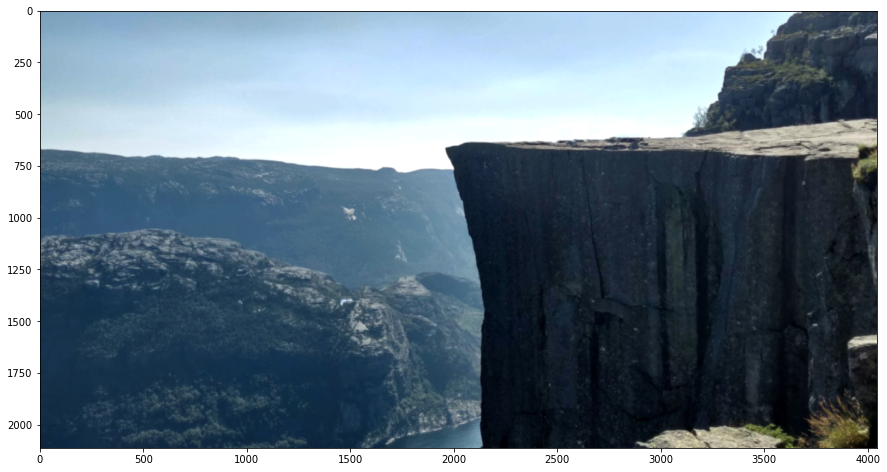

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg 
preikestolen = cv2.imread("preikestolen.jpg")
preikestolen = cv2.cvtColor(preikestolen, cv2.COLOR_BGR2RGB)

# GaussianBlur(src, Size(i, i), deviation in X direction)
blur = cv2.GaussianBlur(preikestolen, (17, 17), 0)
fig_size = [15,10]
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(blur)

# **Contrast**


Code source: https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg 
img = cv2.imread("preikestolen.jpg")
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)


#L*: Lightness, a*: Red/Green Value, b*: Blue/Yellow Value


#Splitting the LAB image to different channels
l, a, b = cv2.split(lab)
#Applying CLAHE to L-channel
# CLAHE: Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
#Merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))
#Converting image from LAB Color model to RGB model
final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
plt.imshow(final)

# **Edge detection** 



Canny(image, minVal, maxVal,  L2gradient(initial:False))

apertureSize = size of Sobel kernel

L2gradient = True: uses more accurate function

***Example 1: Bladge Liverpool***

--2019-11-19 15:38:54--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78308 (76K) [image/png]
Saving to: ‘Badge-Liverpool.png.3’

Badge-Liverpool.png 100%[===================>]  76.47K  --.-KB/s    in 0.008s  

2019-11-19 15:38:54 (9.37 MB/s) - ‘Badge-Liverpool.png.3’ saved [78308/78308]



(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

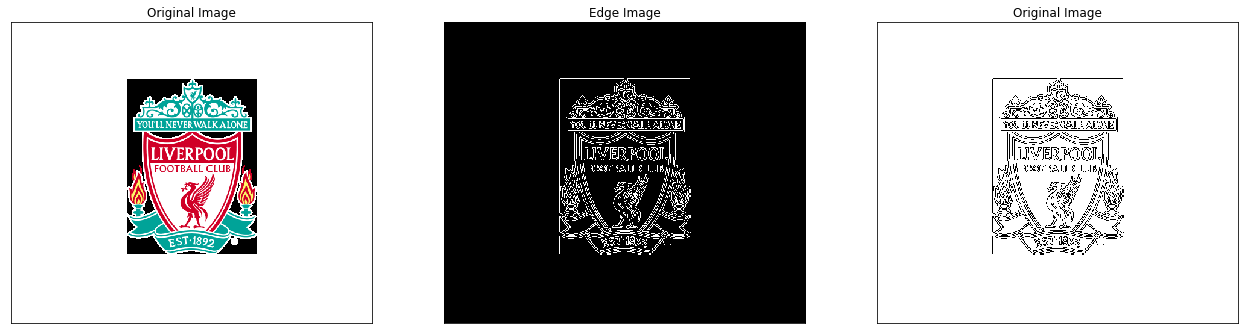

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
liverpool = cv2.imread("Badge-Liverpool.png")
liverpool = cv2.cvtColor(liverpool, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(liverpool, 100, 200,   L2gradient = True)
inverted = cv2.bitwise_not(edges)

fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(131)
plt.imshow(liverpool,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(inverted,cmap = 'gray')
plt.title('Inverted')
plt.xticks([]), plt.yticks([])

***Example 2: Squirrel***

--2019-11-19 15:42:07--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/squirrel.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1023242 (999K) [image/jpeg]
Saving to: ‘squirrel.JPG.3’

squirrel.JPG.3      100%[===================>] 999.26K  --.-KB/s    in 0.03s   

2019-11-19 15:42:07 (38.5 MB/s) - ‘squirrel.JPG.3’ saved [1023242/1023242]



(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

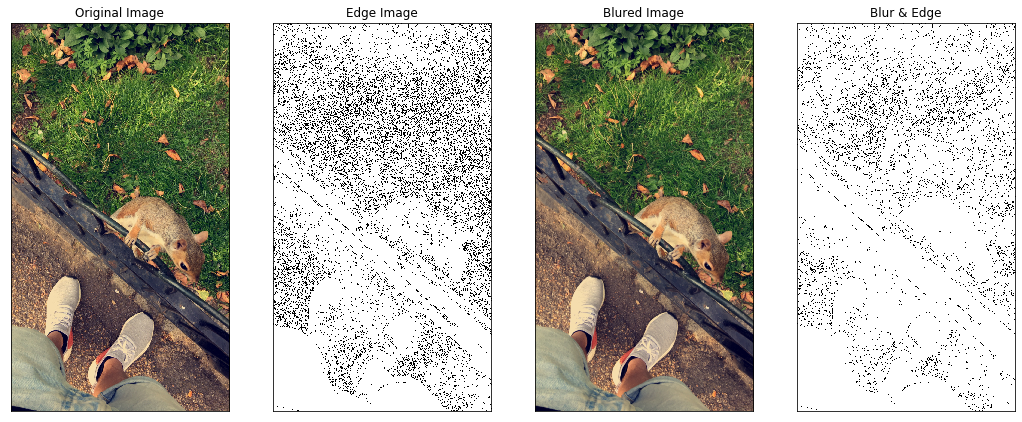

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/squirrel.JPG
squirrel = cv2.imread("squirrel.JPG")
squirrel = cv2.cvtColor(squirrel, cv2.COLOR_BGR2RGB)
edges_1 = cv2.Canny(squirrel, 100, 200, L2gradient = True)
inverted_1 = cv2.bitwise_not(edges_1)
blurred = cv2.GaussianBlur(squirrel, (5, 5), 0)
edges_2 = cv2.Canny(blurred, 100, 200, L2gradient = True)
inverted_2 = cv2.bitwise_not(edges_2)

fig_size = [18,12]
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(141)
plt.imshow(squirrel,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(142)
plt.imshow(inverted_1,cmap = 'gray')
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])
plt.subplot(143)
plt.imshow(blurred,cmap = 'gray')
plt.title('Blured Image')
plt.xticks([]), plt.yticks([])
plt.subplot(144)
plt.imshow(inverted_2,cmap = 'gray')
plt.title('Blur & Edge')
plt.xticks([]), plt.yticks([])

***Example 3: Statue of Liberty***

--2019-11-05 14:42:35--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5581312 (5.3M) [application/octet-stream]
Saving to: ‘P1100010.JPG.5’

P1100010.JPG.5      100%[===================>]   5.32M  --.-KB/s    in 0.07s   

2019-11-05 14:42:35 (77.8 MB/s) - ‘P1100010.JPG.5’ saved [5581312/5581312]



(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

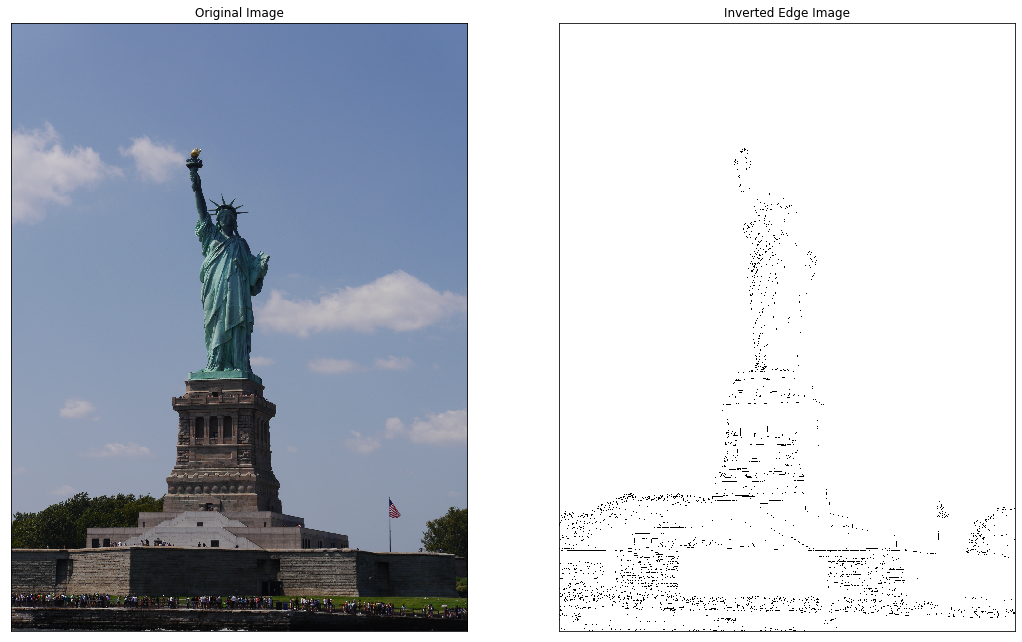

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
statue = cv2.imread("P1100010.JPG")
statue = cv2.cvtColor(statue, cv2.COLOR_BGR2RGB)
statue_edges = cv2.Canny(statue, 100, 200,   L2gradient = True)

statue_edges = cv2.bitwise_not(statue_edges)

fig_size = [18,12]
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(121)
plt.imshow(statue,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(statue_edges,cmap = 'gray')
plt.title('Inverted Edge Image')
plt.xticks([]), plt.yticks([])

***Example 4: Statue of Liberty with increased contrast***

--2019-11-05 14:58:28--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5581312 (5.3M) [application/octet-stream]
Saving to: ‘P1100010.JPG.23’

P1100010.JPG.23     100%[===================>]   5.32M  --.-KB/s    in 0.07s   

2019-11-05 14:58:28 (75.1 MB/s) - ‘P1100010.JPG.23’ saved [5581312/5581312]



(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

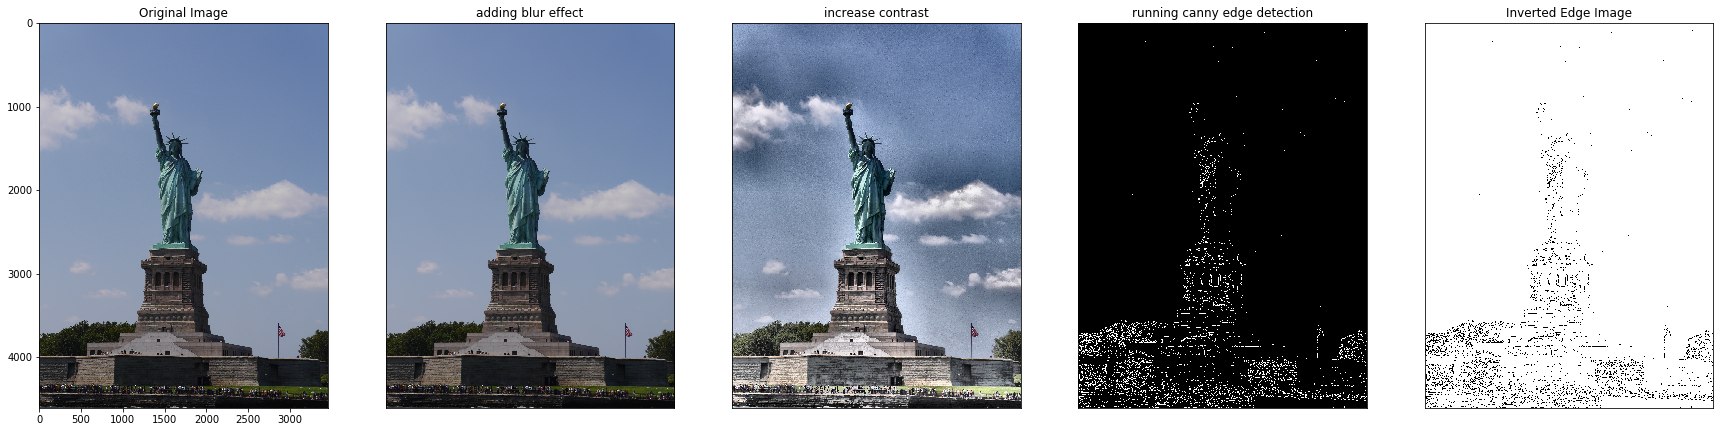

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
statue = cv2.imread("P1100010.JPG")
statue = cv2.cvtColor(statue, cv2.COLOR_BGR2RGB)


lab = cv2.cvtColor(statue, cv2.COLOR_RGB2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8,8))
cl = clahe.apply(l)
limg = cv2.merge((cl,a,b))
contrast = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

edges = cv2.Canny(contrast, 100, 200,   L2gradient = True)

output = cv2.bitwise_not(edges)

fig_size = [30, 20]
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(151)
plt.imshow(statue)
plt.title('Original Image')
plt.subplot(152)
plt.imshow(blur)
plt.title('adding blur effect')
plt.xticks([]), plt.yticks([])
plt.subplot(153)
plt.imshow(contrast)
plt.title('increase contrast')
plt.xticks([]), plt.yticks([])
plt.subplot(154)
plt.imshow(edges, cmap = 'gray')
plt.title('running canny edge detection')
plt.xticks([]), plt.yticks([])
plt.subplot(155)
plt.imshow(output, cmap='gray')
plt.title('Inverted Edge Image')
plt.xticks([]), plt.yticks([])

***Example 5: Face***

--2019-11-05 14:54:51--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face1.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6521344 (6.2M) [application/octet-stream]
Saving to: ‘face1.JPG.4’

face1.JPG.4         100%[===================>]   6.22M  --.-KB/s    in 0.08s   

2019-11-05 14:54:52 (80.8 MB/s) - ‘face1.JPG.4’ saved [6521344/6521344]



(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

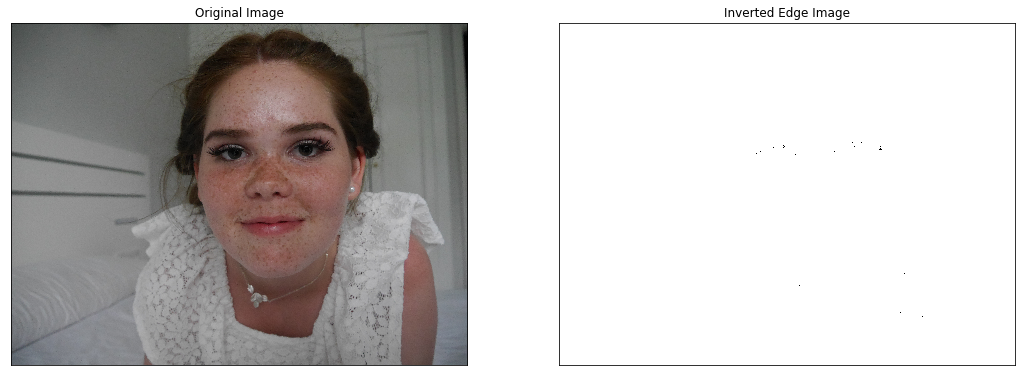

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face1.JPG
face1 = cv2.imread("face1.JPG")
face1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)
face1_edges = cv2.Canny(face1, 100, 200,   L2gradient = True)

face1_edges = cv2.bitwise_not(face1_edges)

fig_size = [18,12]
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(121)
plt.imshow(face1,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(face1_edges,cmap = 'gray')
plt.title('Inverted Edge Image')
plt.xticks([]), plt.yticks([])

# **Color Quantization**


* reducing the colors of an image to a specific number
* using k-means(clustering algorthm)

***Example 1: Statue of Liberty***

Code source: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html

--2019-11-11 13:00:15--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5581312 (5.3M) [application/octet-stream]
Saving to: ‘P1100010.JPG.4’

P1100010.JPG.4      100%[===================>]   5.32M  --.-KB/s    in 0.05s   

2019-11-11 13:00:15 (114 MB/s) - ‘P1100010.JPG.4’ saved [5581312/5581312]



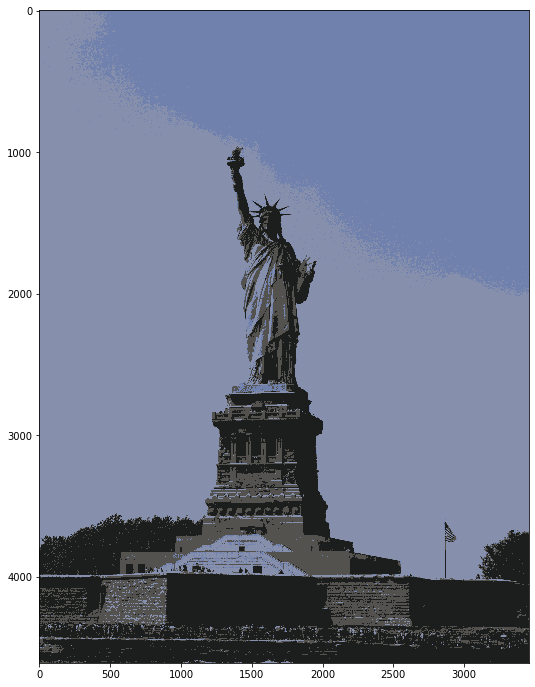

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
statue = cv2.imread("P1100010.JPG")
statue = cv2.cvtColor(statue, cv2.COLOR_BGR2RGB)
Z = statue.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((statue.shape))

fig_size = [18,12]
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(res2)

# **Color Detection with HSV**

***Example 1: Statue of Liberty***

--2019-11-05 14:07:52--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5581312 (5.3M) [application/octet-stream]
Saving to: ‘P1100010.JPG.3’

P1100010.JPG.3      100%[===================>]   5.32M  --.-KB/s    in 0.08s   

2019-11-05 14:07:52 (70.8 MB/s) - ‘P1100010.JPG.3’ saved [5581312/5581312]



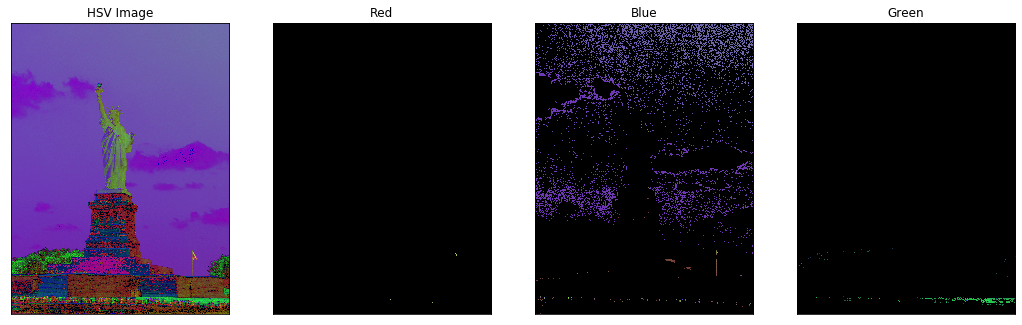

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
statue = cv2.imread("P1100010.JPG")
statue = cv2.cvtColor(statue, cv2.COLOR_BGR2HSV)

# Red color
low_red = np.array([161, 155, 84])
high_red = np.array([179, 255, 255])
red_mask = cv2.inRange(statue, low_red, high_red)
red = cv2.bitwise_and(statue, statue, mask=red_mask)

# Blue color
low_blue = np.array([110,50,50])
high_blue = np.array([130,255,255])
blue_mask = cv2.inRange(statue, low_blue, high_blue)
blue = cv2.bitwise_and(statue, statue, mask=blue_mask)

# Green color
low_green = np.array([25, 52, 72])
high_green = np.array([60, 255, 255])
green_mask = cv2.inRange(statue, low_green, high_green)
green = cv2.bitwise_and(statue, statue, mask=green_mask)

fig_size = [18,12]
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(141)
plt.imshow(statue)
plt.title('HSV Image')
plt.xticks([]), plt.yticks([])
plt.subplot(142)
plt.imshow(red)
plt.title('Red')
plt.xticks([]), plt.yticks([])
plt.subplot(143)
plt.imshow(blue)
plt.title('Blue')
plt.xticks([]), plt.yticks([])
plt.subplot(144)
plt.imshow(green)
plt.title('Green')
plt.xticks([]), plt.yticks([])

--2019-11-05 14:07:59--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5581312 (5.3M) [application/octet-stream]
Saving to: ‘P1100010.JPG.4’

P1100010.JPG.4      100%[===================>]   5.32M  --.-KB/s    in 0.07s   

2019-11-05 14:07:59 (74.7 MB/s) - ‘P1100010.JPG.4’ saved [5581312/5581312]



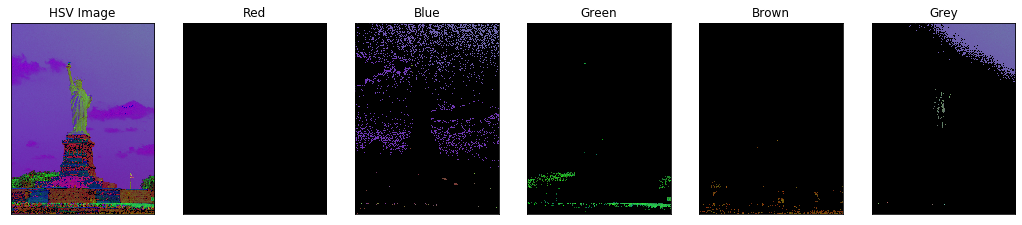

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
statue = cv2.imread("P1100010.JPG")
statue = cv2.cvtColor(statue, cv2.COLOR_BGR2HSV)

# Red color
low_red = np.array([182, 16, 22])
high_red = np.array([255, 23, 31])
red_mask = cv2.inRange(statue, low_red, high_red)
red = cv2.bitwise_and(statue, statue, mask=red_mask)

# Blue color
low_blue = np.array([110,50,50])
high_blue = np.array([130,255,255])
blue_mask = cv2.inRange(statue, low_blue, high_blue)
blue = cv2.bitwise_and(statue, statue, mask=blue_mask)

# Green color
low_green = np.array([0, 100, 0])
high_green = np.array([60, 255, 255])
green_mask = cv2.inRange(statue, low_green, high_green)
green = cv2.bitwise_and(statue, statue, mask=green_mask)

#Brown color
low_brown = np.array([74, 40, 7])
high_brown = np.array([200, 109, 18])
brown_mask = cv2.inRange(statue, low_brown, high_brown)
brown = cv2.bitwise_and(statue, statue, mask=brown_mask)

#Grey color
low_grey = np.array([94, 94, 94])
high_grey = np.array([196, 196, 196])
grey_mask = cv2.inRange(statue, low_grey, high_grey)
grey = cv2.bitwise_and(statue, statue, mask=grey_mask)

plt.subplot(161)
plt.imshow(statue)
plt.title('HSV Image')
plt.xticks([]), plt.yticks([])
plt.subplot(162)
plt.imshow(red)
plt.title('Red')
plt.xticks([]), plt.yticks([])
plt.subplot(163)
plt.imshow(blue)
plt.title('Blue')
plt.xticks([]), plt.yticks([])
plt.subplot(164)
plt.imshow(green)
plt.title('Green')
plt.xticks([]), plt.yticks([])
plt.subplot(165)
plt.imshow(brown)
plt.title('Brown')
plt.xticks([]), plt.yticks([])
plt.subplot(166)
plt.imshow(grey)
plt.title('Grey')
plt.xticks([]), plt.yticks([])

fig_size = [22,16]
plt.rcParams["figure.figsize"] = fig_size

plt.show()

# **SLIC**

Code source: https://github.com/darshitajain/SLIC

In [0]:
import math
from skimage import io, color
from skimage.transform import resize
import numpy as np

In [0]:
# function which returns an object of class SuperPixel
def make_superPixel(h, w,img):
    return SuperPixels(h, w,img[h,w][0],img[h,w][1],img[h,w][2])

In [0]:
# To define the initial cluster centers distanced at S
def initial_cluster_center(S,img,img_h,img_w,clusters):
    h = S // 2
    w = S // 2
    while h < img_h:
        while w < img_w:
            clusters.append(make_superPixel(h, w,img))
            w += S
        w = S // 2
        h += S
    return clusters

In [0]:
# function to calculate gradient at each pixel 
def calc_gradient(h, w,img,img_w,img_h):
    if w + 1 >= img_w:
        w = img_w - 2
    if h + 1 >= img_h:
        h = img_h - 2
    grad = img[w + 1, h + 1][0] - img[w, h][0] + img[w + 1, h + 1][1] - img[w, h][1] + img[w + 1, h + 1][2] - img[w, h][2]
    return grad

In [0]:


# function which reassign the cluster center to the pixel having the lowest gradient
def reassign_cluster_center_acc_to_grad(clusters,img):
    for c in clusters:
        cluster_gradient = calc_gradient(c.h, c.w,img,img_w,img_h)
        for dh in range(-1, 2):
            for dw in range(-1, 2):
                H = c.h + dh
                W = c.w + dw
                new_gradient = calc_gradient(H,W, img,img_w,img_h)
                if new_gradient < cluster_gradient:
                    c.update(H, W,img[H,W][0], img[H,W][1],img[H,W][2])
                    c_gradient = new_gradient



In [0]:
'''
function to assign pixels to the nearest cluster using the Euclidean distance involving both color and spatial
proximity.
'''
def assign_pixels_to_cluster(clusters,S,img,img_h,img_w,tag,dis):
    for c in clusters:
        for h in range(c.h - 2 * S, c.h + 2 * S):
            if h < 0 or h >= img_h: continue
            for w in range(c.w - 2 * S, c.w + 2 * S):
                if w < 0 or w >= img_w: continue
                l, a, b = img[h,w]
                Dc = math.sqrt(math.pow(l - c.l, 2) + math.pow(a - c.a, 2) + math.pow(b - c.b, 2))
                Ds = math.sqrt(math.pow(h - c.h, 2) + math.pow(w - c.w, 2))
                D = math.sqrt(math.pow(Dc / m, 2) + math.pow(Ds /S, 2))
                if D < dis[h,w]:
                    if (h, w) not in tag:
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    else:
                        tag[(h, w)].pixels.remove((h, w))
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    dis[h, w] = D

In [0]:
# function to replace the cluster center with the mean of the pixels contained in the cluster
def update_cluster_mean(clusters):
    for c in clusters:
        sum_h = sum_w = number = 0
        #print("c.pixels",c.pixels)
        for p in c.pixels:
            sum_h += p[0]
            sum_w += p[1]
            number += 1
            H = sum_h // number
            W = sum_w // number
            c.update(H, W,img[H, W][0], img[H, W][1], img[H, W][2])

In [0]:
# replace the color of each pixel in a cluster by the color of the cluster's center
def avg_color_cluster(img,name,clusters):
    image = np.copy(img)
    for c in clusters:
        for p in c.pixels:
            image[p[0],p[1]][0] = c.l
            image[p[0],p[1]][1] = c.a
            image[p[0],p[1]][2] = c.b
        # To change the color of cluster center to Black
        image[c.h, c.w][0] = 0
        image[c.h, c.w][1] = 0
        image[c.h, c.w][2] = 0
    return lab2rgb(name, image)

In [0]:
# function for the Simple Linear Iterative Clustering
def slic(S,img,img_h,img_w,clusters,tag,dis):
    clusters = initial_cluster_center(S,img,img_h,img_w,clusters)
    reassign_cluster_center_acc_to_grad(clusters,img)
    for i in range(10): # usually the algortihm converges within 10 iterations
        assign_pixels_to_cluster(clusters,S,img,img_h,img_w,tag,dis)
        update_cluster_mean(clusters)
        if i == 9 : # to print the output after 10 iterations
            name = 'out_m{m}_k{k}.png'.format(loop=i, m=m, k=k)
            output = avg_color_cluster(img,name, clusters)
    return clusters, output

In [0]:
# function to convert LAB images back to RGB and save it
def lab2rgb(path, lab_arr):
    rgb_arr = color.lab2rgb(lab_arr)
    return rgb_arr

In [0]:
# A class to initialize the super pixels, of the form - [h,y,l,a,b].
class SuperPixels(object):

    def __init__(self, h, w, l=0, a=0, b=0):
        self.update(h, w, l, a, b)
        self.pixels = []

    def update(self, h, w, l, a, b):
        self.h = h
        self.w = w
        self.l = l
        self.a = a
        self.b = b

In [0]:

# read the input image
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
game = cv2.imread("Board-Game.jpeg")
rgb = cv2.cvtColor(game, cv2.COLOR_BGR2RGB)

# input images are resized to (400 x 400) for processing
img = resize(rgb, (400,400),anti_aliasing=True)
print(img.shape)

# convert RGB to LAB
img = color.rgb2lab(img)

k = 100   # Number of Super pixels
m = 20    # Constant for normalizing the color proximity, range of m = [1,40]

img_h = img.shape[0] # Image Height
img_w = img.shape[1] # Image Width

N = img_h * img_w  # Total number of pixels in the image
S = int(math.sqrt(N /k)) # average size of each superpixel

clusters = []
tag = {}
# initialize the distance between pixels and cluster center as infinity
dis = np.full((img_h, img_w), np.inf)

--2019-11-12 11:51:23--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19390 (19K) [image/jpeg]
Saving to: ‘Board-Game.jpeg.9’

Board-Game.jpeg.9   100%[===================>]  18.94K  --.-KB/s    in 0.007s  

2019-11-12 11:51:23 (2.76 MB/s) - ‘Board-Game.jpeg.9’ saved [19390/19390]

(400, 400, 3)


In [0]:
cluster,output = slic(S,img,img_h,img_w,clusters,tag,dis)

In [0]:
# superpixels
for c in cluster:
    print("H {} : W {}, l {}, a {}, b {}".format(c.h,c.w,c.l,c.a,c.b))

In [0]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt

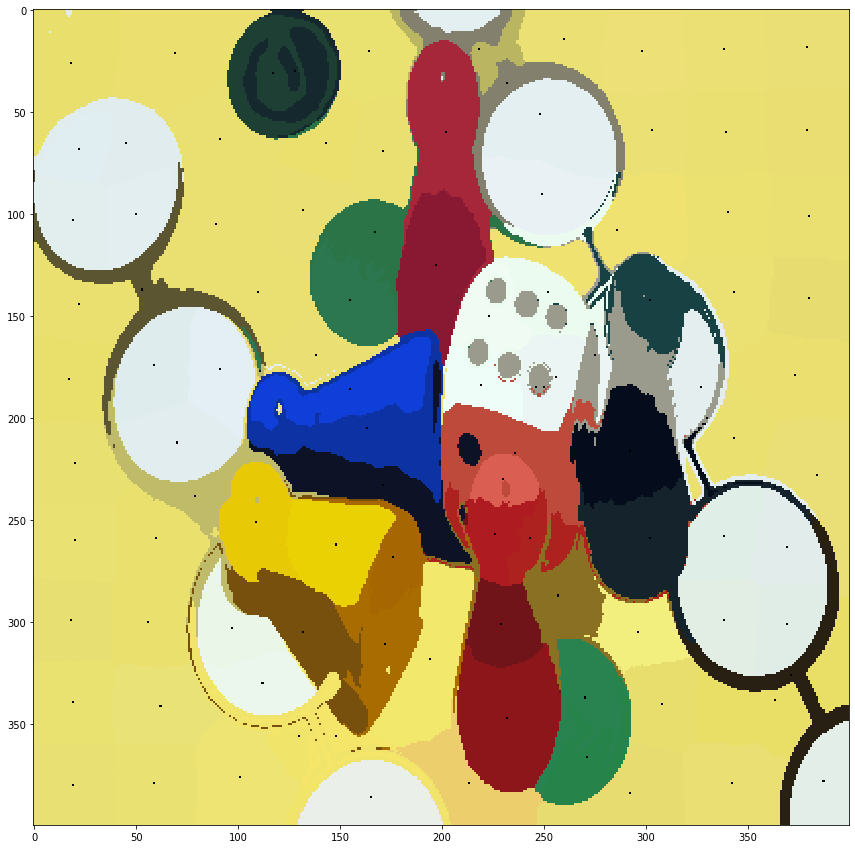

In [0]:
plt.imshow(output)

# **SLIC - Alternative**

Source: https://www.pyimagesearch.com/2017/06/26/labeling-superpixel-colorfulness-opencv-python/

In [0]:
# import packages
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np
import argparse
import cv2

In [0]:
def segment_colorfulness(image, mask):
	# split the image into its respective RGB components, then mask
	# each of the individual RGB channels so we can compute
	# statistics only for the masked region
	(B, G, R) = cv2.split(image.astype("float"))
	R = np.ma.masked_array(R, mask=mask)
	G = np.ma.masked_array(B, mask=mask)
	B = np.ma.masked_array(B, mask=mask)
 
	# compute rg = R - G
	rg = np.absolute(R - G)
 
	# compute yb = 0.5 * (R + G) - B
	yb = np.absolute(0.5 * (R + G) - B)
 
	# compute the mean and standard deviation of both `rg` and `yb`,
	# then combine them
	stdRoot = np.sqrt((rg.std() ** 2) + (yb.std() ** 2))
	meanRoot = np.sqrt((rg.mean() ** 2) + (yb.mean() ** 2))
 
	# derive the "colorfulness" metric and return it
	return stdRoot + (0.3 * meanRoot)

In [0]:
# load the image in OpenCV format so we can draw on it later, then
# allocate memory for the superpixel colorfulness visualization
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/squirrel.JPG
orig = cv2.imread("squirrel.JPG")
vis = np.zeros(orig.shape[:2], dtype="float")
 
# load the image and apply SLIC superpixel segmentation to it via
# scikit-image
image = io.imread("squirrel.JPG")
segments = slic(img_as_float(image), n_segments=256,
	slic_zero=True)

--2019-11-05 13:53:44--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/squirrel.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1023242 (999K) [image/jpeg]
Saving to: ‘squirrel.JPG.1’

squirrel.JPG.1      100%[===================>] 999.26K  --.-KB/s    in 0.04s   

2019-11-05 13:53:45 (22.1 MB/s) - ‘squirrel.JPG.1’ saved [1023242/1023242]



In [0]:
# loop over each of the unique superpixels
for v in np.unique(segments):
	# construct a mask for the segment so we can compute image
	# statistics for *only* the masked region
	mask = np.ones(image.shape[:2])
	mask[segments == v] = 0
 
	# compute the superpixel colorfulness, then update the
	# visualization array
	C = segment_colorfulness(orig, mask)
	vis[segments == v] = C

In [0]:
# scale the visualization image from an unrestricted floating point
# to unsigned 8-bit integer array so we can use it with OpenCV and
# display it to our screen
vis = rescale_intensity(vis, out_range=(0, 255)).astype("uint8")
 
# overlay the superpixel colorfulness visualization on the original
# image
alpha = 0.6
overlay = np.dstack([vis] * 3)
out = orig.copy()
cv2.addWeighted(overlay, alpha, out, 1 - alpha, 0, out)

array([[[ 48,  43,  53],
        [ 37,  33,  42],
        [ 37,  35,  45],
        ...,
        [ 94, 126, 142],
        [ 95, 124, 141],
        [ 89, 119, 135]],

       [[ 54,  50,  59],
        [ 40,  37,  46],
        [ 41,  39,  49],
        ...,
        [ 90, 121, 138],
        [ 82, 112, 127],
        [ 76, 105, 120]],

       [[ 51,  49,  58],
        [ 41,  40,  49],
        [ 51,  51,  60],
        ...,
        [ 86, 116, 131],
        [ 77, 106, 119],
        [ 69,  98, 110]],

       ...,

       [[ 29,  15,  15],
        [ 29,  15,  15],
        [ 29,  15,  15],
        ...,
        [ 46,  51,  62],
        [ 49,  54,  65],
        [ 51,  56,  67]],

       [[ 29,  15,  15],
        [ 29,  15,  15],
        [ 29,  15,  15],
        ...,
        [ 48,  52,  64],
        [ 55,  60,  71],
        [ 56,  62,  73]],

       [[ 29,  15,  15],
        [ 29,  15,  15],
        [ 29,  15,  15],
        ...,
        [ 47,  51,  63],
        [ 54,  59,  70],
        [ 56,  62,  73]]

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

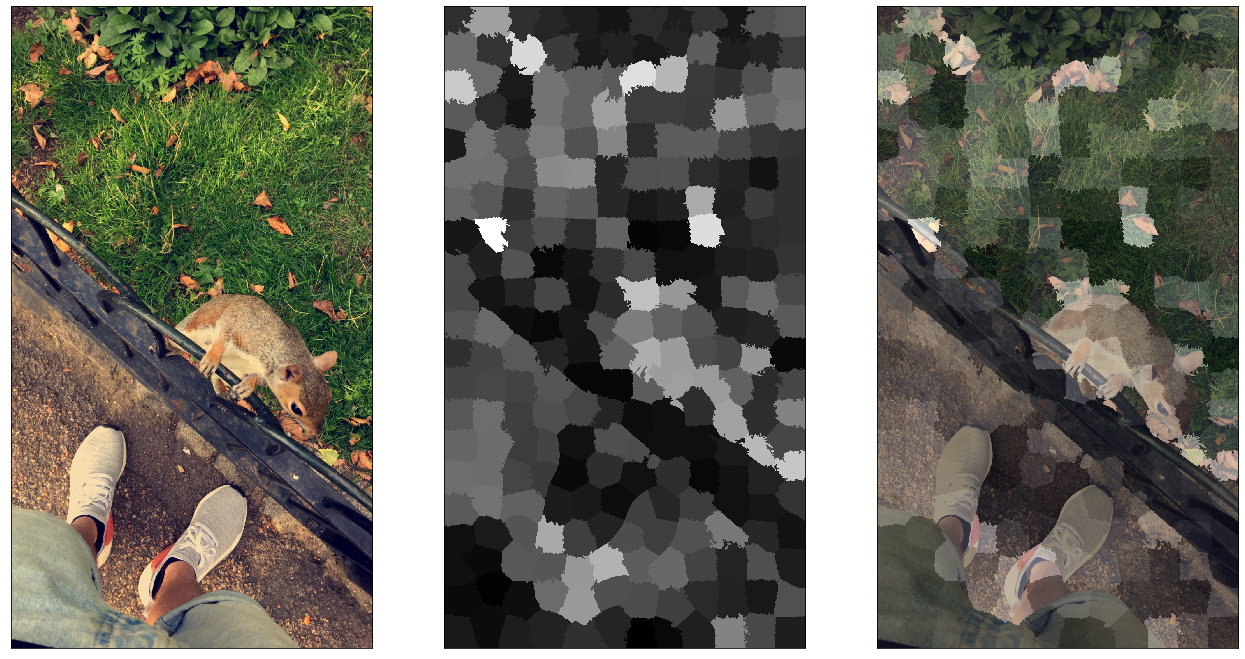

In [0]:
# show the output images
from matplotlib import pyplot as plt
origin = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
output = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(131)
plt.imshow(origin)
plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(vis, cmap= 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(output)
plt.xticks([]), plt.yticks([])


# **Our version of SLIC**

In [0]:
# function which returns an object of class SuperPixel(height, weidth, l, a, b). Superpixels have a center(h,w) and a color(lab)
def make_superPixel(h, w,img):
    return SuperPixels(h, w,img[h,w][0],img[h,w][1],img[h,w][2])

In [0]:
# To define the initial cluster centers distanced at S
def initial_cluster_center(S,img,img_h,img_w,clusters):
    h = S // 2
    w = S // 2
    while h < img_h:
        while w < img_w:
            clusters.append(make_superPixel(h, w,img))
            w += S
        w = S // 2
        h += S
    return clusters

In [0]:
# function to calculate gradient at each pixel.
def calc_gradient(h, w,img,img_w,img_h):
    if w + 1 >= img_w:
        w = img_w - 2
    if h + 1 >= img_h:
        h = img_h - 2
    grad = img[w + 1, h + 1][0] - img[w, h][0] + img[w + 1, h + 1][1] - img[w, h][1] + img[w + 1, h + 1][2] - img[w, h][2]
    return grad

In [0]:
# function which reassign for each cluster the cluster center to the pixel having the lowest gradient
def reassign_cluster_center_acc_to_grad(clusters,img):
    for c in clusters:
        cluster_gradient = calc_gradient(c.h, c.w,img,img_w,img_h)
        for dh in range(-1, 2):
            for dw in range(-1, 2):
                H = c.h + dh
                W = c.w + dw
                new_gradient = calc_gradient(H,W, img,img_w,img_h)
                if new_gradient < cluster_gradient:
                    c.update(H, W,img[H,W][0], img[H,W][1],img[H,W][2])
                    c_gradient = new_gradient


In [0]:
#function to assign pixels to the nearest cluster using the Euclidean distance involving both color and spatial proximity.

def assign_pixels_to_cluster(clusters,S,img,img_h,img_w,tag,dis):
    for c in clusters:
        for h in range(c.h - 2 * S, c.h + 2 * S):
            if h < 0 or h >= img_h: continue
            for w in range(c.w - 2 * S, c.w + 2 * S):
                if w < 0 or w >= img_w: continue
                l, a, b = img[h,w]
                Dc = math.sqrt(math.pow(l - c.l, 2) + math.pow(a - c.a, 2) + math.pow(b - c.b, 2))
                Ds = math.sqrt(math.pow(h - c.h, 2) + math.pow(w - c.w, 2))
                D = math.sqrt(math.pow(Dc / m, 2) + math.pow(Ds /S, 2))
                if D < dis[h,w]:
                    if (h, w) not in tag:
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    else:
                        tag[(h, w)].pixels.remove((h, w))
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    dis[h, w] = D

In [0]:
# function to replace the cluster center with the mean of the pixels contained in the cluster
def update_cluster_mean(clusters):
    for c in clusters:
        sum_h = sum_w = number = 0
        #print("c.pixels",c.pixels)
        for p in c.pixels:
            sum_h += p[0]
            sum_w += p[1]
            number += 1
            H = sum_h // number
            W = sum_w // number
            c.update(H, W,img[H, W][0], img[H, W][1], img[H, W][2])

In [0]:
# replace the color of each pixel in a cluster by the color of the cluster's center
def avg_color_cluster(img, clusters):
    image = np.copy(img)
    for c in clusters:
        for p in c.pixels:
            image[p[0],p[1]][0] = c.l
            image[p[0],p[1]][1] = c.a
            image[p[0],p[1]][2] = c.b
    return color.lab2rgb(image)

In [0]:
def slic(S,img,img_h,img_w,clusters,tag,dis,iter):
    clusters = initial_cluster_center(S,img,img_h,img_w,clusters)
    reassign_cluster_center_acc_to_grad(clusters,img)
    for i in range(iter): # usually the algortihm converges within 10 iterations
        assign_pixels_to_cluster(clusters,S,img,img_h,img_w,tag,dis)
        update_cluster_mean(clusters)
        if i == (iter - 1) : # to print the output after 10 iterations
            output = avg_color_cluster(img, clusters)
    return clusters, output

In [0]:
# function to resize and cut the image to (400 x 400)
def resize_image(img):
    h = img.shape[0]
    w = img.shape[1]
    diff = abs(int((h - w)/2))
    if h < w:
      new_w = diff + h
      img = img[0:h, diff:new_w]
    elif h > w:
      new_h = diff + w
      img = img[diff:new_h, 0:w]
    img = resize(img, (400,400),anti_aliasing=True)
    return img

In [0]:
# A class to initialize the super pixels, of the form - [h,y,l,a,b].
class SuperPixels(object):

    def __init__(self, h, w, l=0, a=0, b=0):
        self.update(h, w, l, a, b)
        self.pixels = []

    def update(self, h, w, l, a, b):
        self.h = h
        self.w = w
        self.l = l
        self.a = a
        self.b = b

--2019-11-19 16:00:15--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19390 (19K) [image/jpeg]
Saving to: ‘Board-Game.jpeg.4’

Board-Game.jpeg.4   100%[===================>]  18.94K  --.-KB/s    in 0.004s  

2019-11-19 16:00:15 (4.86 MB/s) - ‘Board-Game.jpeg.4’ saved [19390/19390]

--2019-11-19 16:00:17--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, 

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

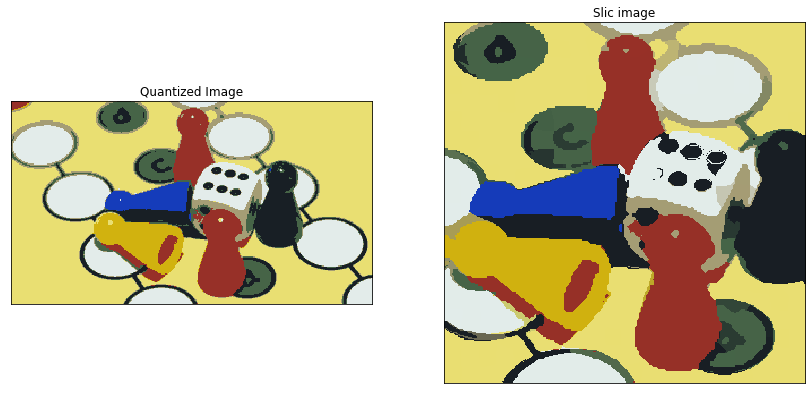

In [0]:
import math
from skimage import io, color
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.transform import resize

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
game = cv2.imread("Board-Game.jpeg")
game = cv2.cvtColor(game, cv2.COLOR_BGR2RGB)

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
statue = cv2.imread("P1100010.JPG")
statue = cv2.cvtColor(statue, cv2.COLOR_BGR2RGB)

input = game

#Color Quantization
Z = input.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
img_cq = res.reshape((input.shape))

#Median blur
img_pp = cv2.medianBlur(img_cq, 3)

#Slic
# input images are resized to (400 x 400) for processing
img = resize_image(img_pp)

# convert RGB to LAB
img = color.rgb2lab(img)

k = 400  # Number of Super pixels
m = 20    # Constant for normalizing the color proximity, range of m = [1,40]

img_h = img.shape[0] # Image Height
img_w = img.shape[1] # Image Width

N = img_h * img_w  # Total number of pixels in the image
S = int(math.sqrt(N /k)) # average size of each superpixel

clusters = []
tag = {}
# initialize the distance between pixels and cluster center as infinity
dis = np.full((img_h, img_w), np.inf)

cluster,output = slic(S,img,img_h,img_w,clusters,tag,dis,7)

#Edge detection
#edges = cv2.Canny(output, 100, 200,   L2gradient = True)
#edges_inv = cv2.bitwise_not(edges)


fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(131)
plt.imshow(img_cq,cmap = 'gray')
plt.title('Quantized Image')
plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(output)
plt.title('Slic image')
plt.xticks([]), plt.yticks([])





**# Yet Another SLIC Algorithm**
Source: https://www.pyimagesearch.com/2014/07/28/a-slic-superpixel-tutorial-using-python/

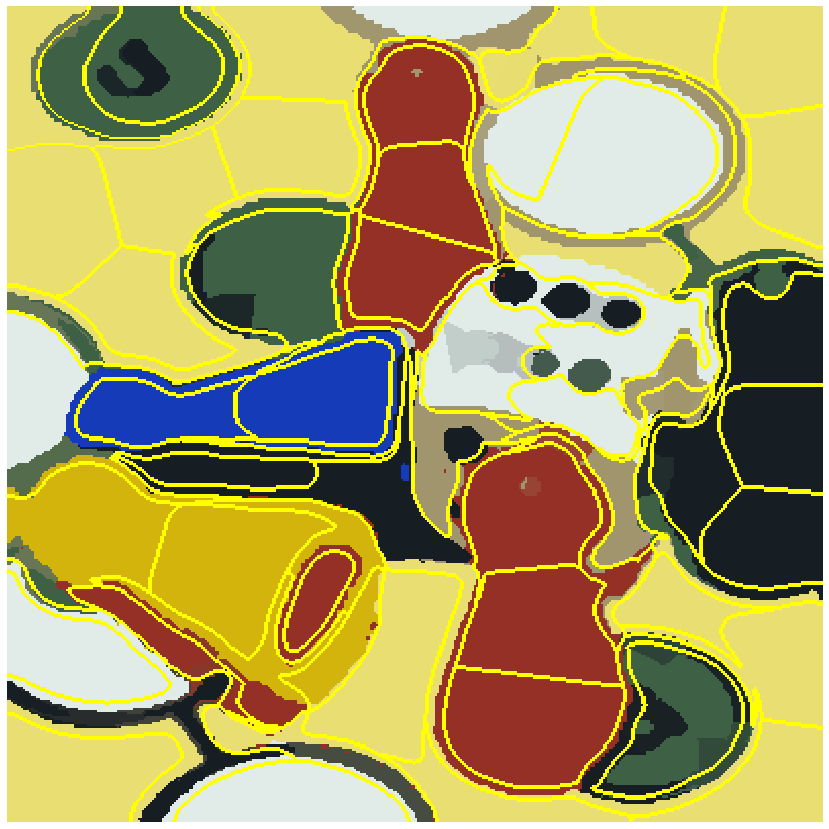

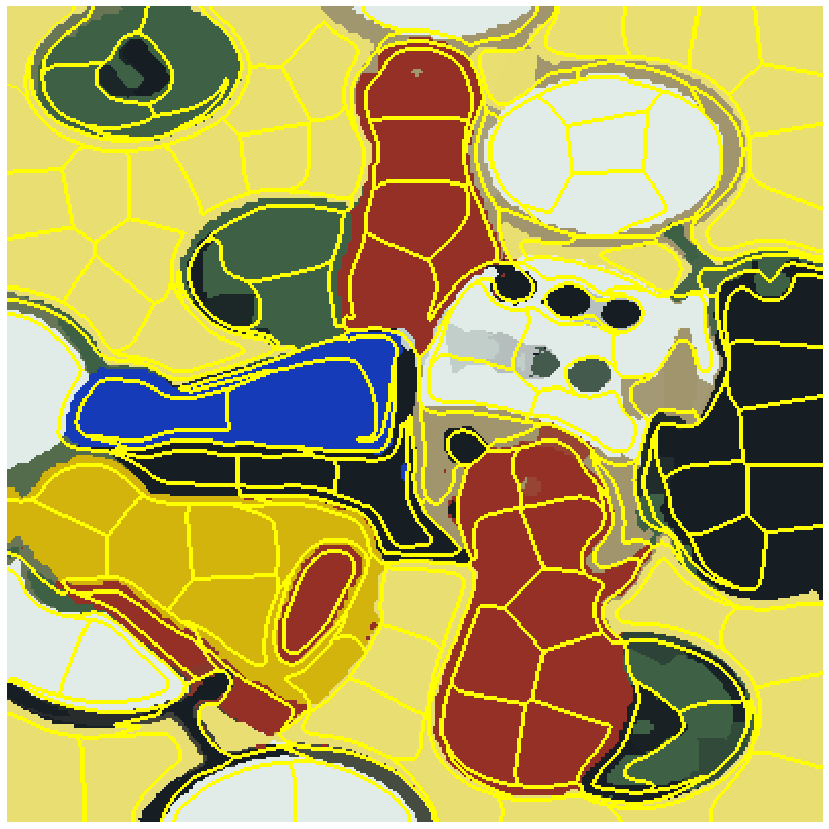

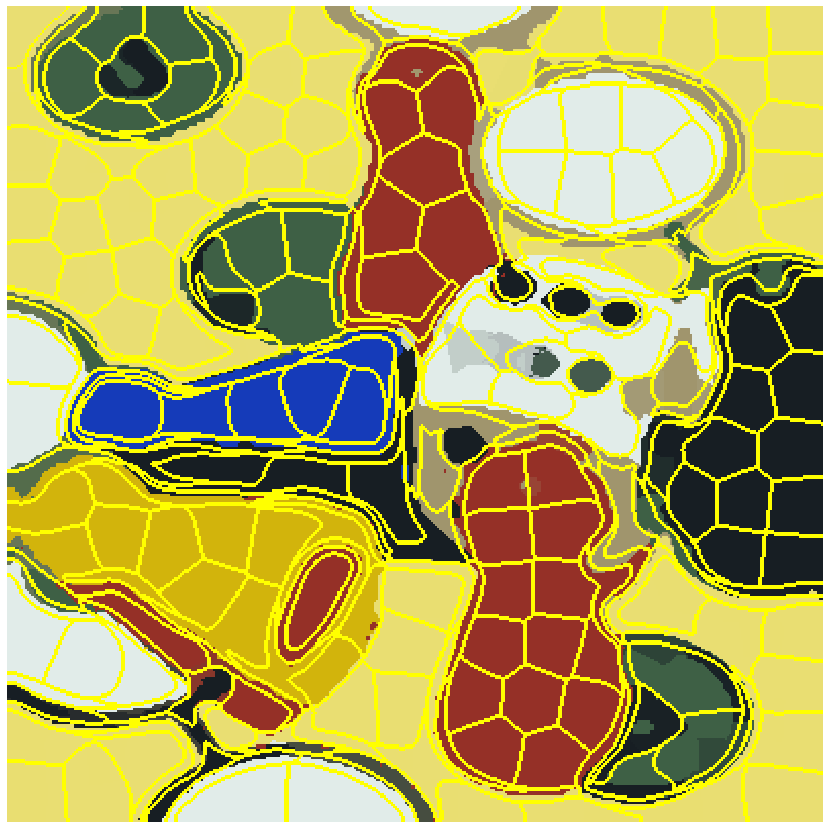

In [0]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
 
 
# loop over the number of segments
for numSegments in (100, 200, 300):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
	segments = slic(output, n_segments = numSegments, sigma = 5)
 
	# show the output of SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(mark_boundaries(output, segments))
	plt.axis("off")
 
# show the plots
plt.show()

# **Color set**



*   Red: RGB: 255,0,0 HSV: 0,100,100
*   Yellow: RGB: 255,255,0 HSV: 60,100,100
*   Green: RGB: 0,255,0 HSV: 120,100,100
*   Blue: RGB: 0,0,255 HSV: 240,100,100
*   Pink: RGB: 255,0,255 HSV: 300,100,100
*   Purple: RGB: 200,0,255 HSV: 287,100,100
*   Light blue: RGB: 191,239,255 HSV: 195,25,100
*   Dark blue RGB: 25,25,112 HSV: 240,78,44
*   Dark Green: RGB: 0,99,0 HSV: 120,100,39
*   Skin: RGB: 255,229,196 HSV: 33,23,100
*   Brown: RGB: 140,92,43 HSV: 30,69,55
*   Light brown: RGB: 222,184,135 HSV: 33,39,87
*   Dark red: RGB: 140,0,0 HSV: 0,100,55
*   Gray: RGB: 204,204,204 HSV: 0,0,80
*   White: RGB: 255,255,255 HSV: 0,0,100
*   Black: RGB: 0,0,0 HSV: 0,0,0


# **Color replacing algorithm**

In [0]:
color_set_rgb = [[255,0,0],
             [255,255,0],
             [0,255,0],
             [0,0,255],
             [255,0,255],
             [200,0,255],
             [191,239,255],
             [25,25,112],
             [0,99,0],
             [225,229,196],
             [140,92,43],
             [222,184,135],
             [140,0,0],
             [204,204,204],
             [255,255,255],
             [0,0,0]]

In [0]:
color_set_hsv = [[0,255,255],
             [60,255,255],
             [120,255,255],
             [240,255,255],
             [300,255,255],
             [287,255,255],
             [195,64,255],
             [240,199,112],
             [120,255,100],
             [33,59,255],
             [30,176,140],
             [33,100,222],
             [0,255,140],
             [0,0,204],
             [0,0,255],
             [0,0,0]]

Use color quantization/k-means clustering to reduce the colors in the image

--2019-11-19 16:20:08--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19390 (19K) [image/jpeg]
Saving to: ‘Board-Game.jpeg.10’

Board-Game.jpeg.10  100%[===================>]  18.94K  --.-KB/s    in 0.004s  

2019-11-19 16:20:08 (5.15 MB/s) - ‘Board-Game.jpeg.10’ saved [19390/19390]

--2019-11-19 16:20:10--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent

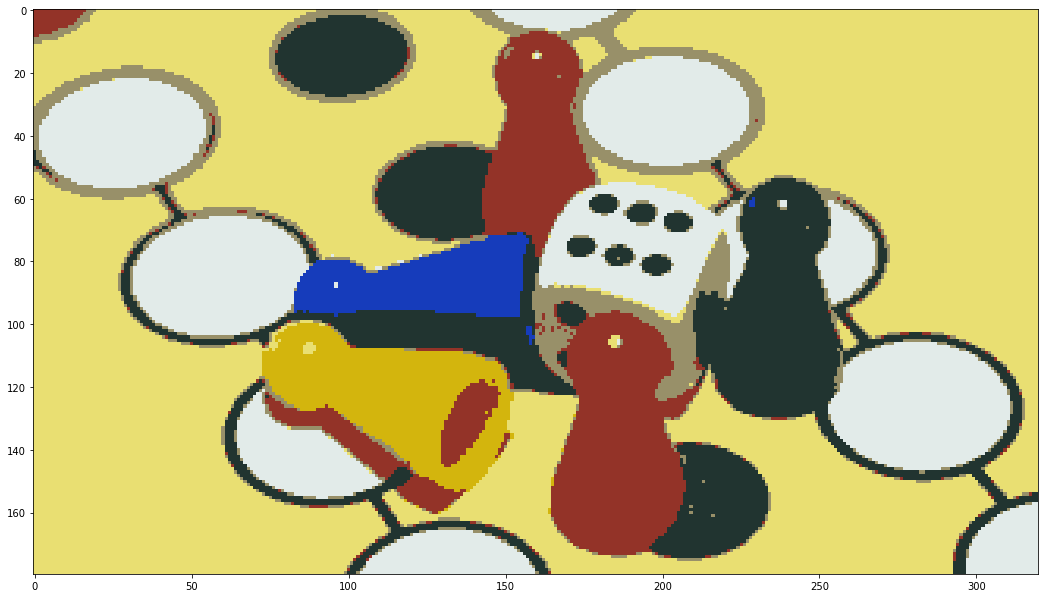

In [0]:
import numpy as np
import cv2
from skimage.transform import resize
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
game = cv2.imread("Board-Game.jpeg")

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
statue = cv2.imread("P1100010.JPG")

img = cv2.cvtColor(game, cv2.COLOR_BGR2RGB)


#img = resize_image(img)
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 7
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
output = res.reshape((img.shape))

fig_size = [18,12]
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(output)

Replace the colors with colors from the color set

In [0]:
def contains(list1, list2):
  for e in list1:
    if e[0] == list2[0] and e[1] == list2[1] and e[2] == list2[2]:
      return True
  return False



[  3 186 147  12  83]
[ 25  79 152  11 111]
[ 27 130 233  14 219]
[ 83  10 235   6 354]
[ 84  93  52   8 300]
[113 225 187  15 694]
[   25   239   211     0 10000]


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

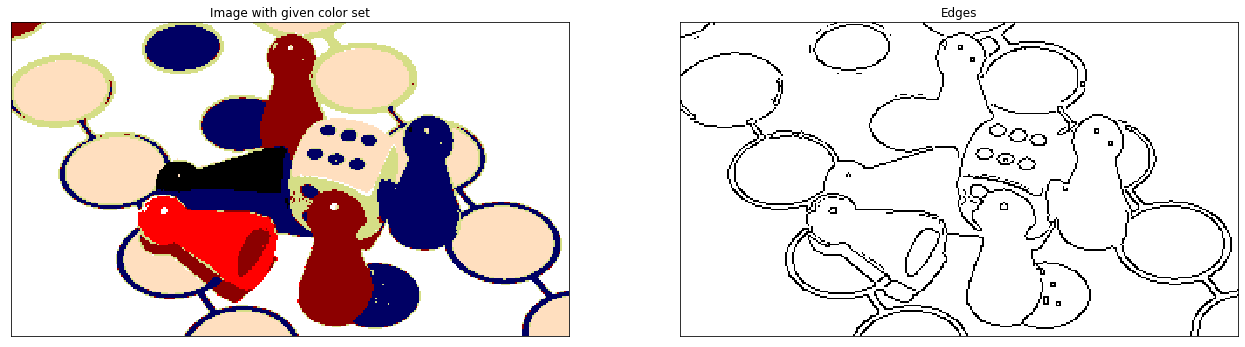

In [0]:
picture_colors = []
matched_to = []
used = []

hsv = cv2.cvtColor(output, cv2.COLOR_RGB2HSV)

h = hsv.shape[0]
w = hsv.shape[1]
# Get the colors in the picture
for y in range(0, h):
  for x in range(0, w):
    if not contains(picture_colors, hsv[y,x]):
      picture_colors.append(hsv[y,x])
for i in range(len(picture_colors)):
  picture_colors[i] = np.append(picture_colors[i],[0,10000])
  e = picture_colors[i]
  for j in range(0,len(color_set)):
    if j not in used:
      c = color_set[j]
      value = abs(2.5*(c[0] - e[0])) + abs(c[1] - e[1]) + abs(c[2] - e[2])
      if(value<e[4]):
        used.append(j)
        e[3] = j
        e[4] = value
final = hsv.copy()
for e in picture_colors:  
  print(e)  
  mask = cv2.inRange(hsv, e[0:3], e[0:3])
  final[mask > 0] = color_set[e[3]]
final = cv2.cvtColor(final, cv2.COLOR_HSV2RGB)
edges = cv2.cvtColor(final, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(edges, 50, 150,   L2gradient = True)
edges = cv2.bitwise_not(edges)
fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(121)
plt.imshow(final)
plt.title('Image with given color set')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.xticks([]), plt.yticks([])

# **Image Segmentation Using Color Detection**

In [0]:
https://realpython.com/python-opencv-color-spaces/

import cv2
import matplotlib.pyplot as plt
import numpy as np

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
game = cv2.imread("Board-Game.jpeg")

--2019-11-19 07:43:23--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19390 (19K) [image/jpeg]
Saving to: ‘Board-Game.jpeg.1’

Board-Game.jpeg.1   100%[===================>]  18.94K  --.-KB/s    in 0.01s   

2019-11-19 07:43:23 (1.52 MB/s) - ‘Board-Game.jpeg.1’ saved [19390/19390]



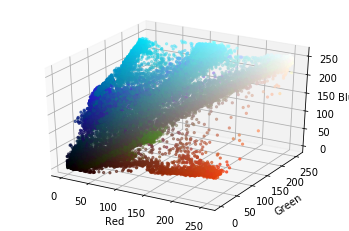

In [0]:
#libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

#Visualizing in RGB Color Space

#set up plot
#split(): splits an image into its component channels
r, g, b = cv2.split(game)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = game.reshape((np.shape(game)[0]*np.shape(game)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()


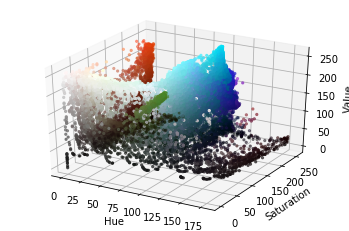

In [0]:
hsv_game = cv2.cvtColor(game, cv2.COLOR_RGB2HSV)

#Visualizing in HSV Color Space
h, s, v = cv2.split(hsv_game)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

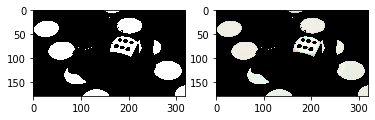

In [0]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(hsv_game, light_white, dark_white)
result_white = cv2.bitwise_and(game, game, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

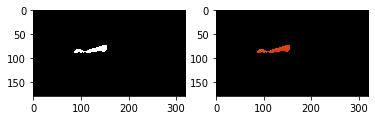

In [0]:
light_blue = (1, 190, 200)
dark_blue = (18, 255, 255)

mask_blue = cv2.inRange(hsv_game, light_blue, dark_blue)
result_blue = cv2.bitwise_and(game, game, mask=mask_blue)

plt.subplot(1, 2, 1)
plt.imshow(mask_blue, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_blue)
plt.show()